**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 11 – DNN-Classifier

Justin Park, 29 November 2022

**Instructions:**
1. Load the Dogs & Cats Images dataset from https://www.kaggle.com/chetankv/dogs-cats-images (Links to an external site.). Use tf.keras.preprocessing.image.ImageDataGenerator to generate batches of tensor image data from RGB images.
2. Build an image classifier using a sequential model with the following layers:
   - a flatten layer to convert each input image into a 1D array
   - a hidden dense layer with 300 neurons, ELU activation function, and He initialization
   - a hidden dense layer with 100 neurons, ELU activation function, and He initialization
   - a dense output layer
3. Train the model for 5 epochs.
4. Visualize some images along with their predictions. What do you observe from the predictions?
5. Plot the learning curve (the mean training loss and accuracy measured over each epoch, and the mean validation loss and accuracy measured at the end of each epoch).
6. Build the second model by applying Batch Normalization after every hidden layer and as the first layer in the model (after flattening the input images). Train the model for 5 epochs and plot the learning curve.
7. Build a CNN model with the following layers.  Train the model for 5 epochs and plot the learning curve.
   - a convolutional layer with 32 3x3 filters and ReLU activation function
   - a max pooling layer with a pool size of 2
   - a convolutional layer with 64 3x3 filters and ReLU activation function
   - a max pooling layer with a pool size of 2
   - a convolutional layer with 128 3x3 filters and ReLU activation function
   - a max pooling layer with a pool size of 2
   - a flatten layer
   - a dense layer with 64 neurons and ELU activation function
   - a dense layer with 32 neurons and ELU activation function
   - a dense output layer
8. Build the second CNN model by adding Dropout with dropout rate of 20% after every max pooling layer and hidden dense layer. Train the model for 5 epochs and plot the learning curve.
9. Discuss the differences between the 4 models in terms of their performance and the number of parameters.

### 1. Load the Dogs & Cats Images dataset from https://www.kaggle.com/chetankv/dogs-cats-images

In [1]:
import os
from tensorflow import keras

data_path = os.path.join("datasets", "dogs_cats")
train_path = os.path.join(data_path, "training_set")
test_path = os.path.join(data_path, "test_set")

# Use ImageDataGenerator to prepare the dataset
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)

batch_size = 32
image_size = 64
data_train = data_generator.flow_from_directory(
    directory = train_path,
    target_size = (image_size,image_size),
    batch_size = batch_size,
    class_mode = 'binary'
)
print(data_train.image_shape)

# TODO: Create data_test for the test/validation set. For the purpose of this lab, 
# we'll use the test set for validation, although this is not a good practice.
batch_size = 32
image_size = 64
data_test = data_generator.flow_from_directory(
    directory = test_path,
    target_size = (image_size,image_size),
    batch_size = batch_size,
    class_mode = 'binary'
)
print(data_test.image_shape)

Found 8000 images belonging to 2 classes.
(64, 64, 3)
Found 2000 images belonging to 2 classes.
(64, 64, 3)


### 2. Build an image classifier using a sequential model with the following layers:

- a flatten layer to convert each input image into a 1D array
- a hidden dense layer with 300 neurons, ELU activation function, and He initialization
- a hidden dense layer with 100 neurons, ELU activation function, and He initialization
- a dense output layer

In [2]:
model_dnn1 = keras.models.Sequential()
model_dnn1.add(keras.layers.Flatten(input_shape=[64, 64, 3]))
model_dnn1.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
model_dnn1.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model_dnn1.add(keras.layers.Dense(1, activation="sigmoid"))
model_dnn1.compile(loss="binary_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

# Displays all the model’s layers
model_dnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 300)               3686700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,716,901
Trainable params: 3,716,901
Non-trainable params: 0
_________________________________________________________________


### 3. Train the model for 5 epochs

In [3]:
fitted_model = model_dnn1.fit(data_train, epochs=5, validation_data=(data_test))

Epoch 1/5
250/250 [==============================] - 67s 265ms/step - loss: 0.7200 - accuracy: 0.5447 - val_loss: 0.6766 - val_accuracy: 0.5750
Epoch 2/5
250/250 [==============================] - 61s 244ms/step - loss: 0.6667 - accuracy: 0.5863 - val_loss: 0.6540 - val_accuracy: 0.6215
Epoch 3/5
250/250 [==============================] - 61s 244ms/step - loss: 0.6506 - accuracy: 0.6151 - val_loss: 0.6730 - val_accuracy: 0.5885
Epoch 4/5
250/250 [==============================] - 64s 258ms/step - loss: 0.6440 - accuracy: 0.6189 - val_loss: 0.6515 - val_accuracy: 0.6080
Epoch 5/5
250/250 [==============================] - 67s 268ms/step - loss: 0.6345 - accuracy: 0.6380 - val_loss: 0.6900 - val_accuracy: 0.5700


### 4. Visualize some images along with their predictions.

### 5. Plot the learning curve

<AxesSubplot:>

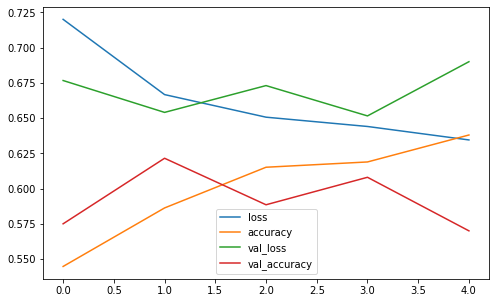

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(fitted_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 6. Build the second model by applying Batch Normalization after every hidden layer and as the first layer in the model (after flattening the input images). Train the model for 5 epochs and plot the learning curve.

In [7]:
model_dnn2 = keras.models.Sequential()
model_dnn2.add(keras.layers.Flatten(input_shape=[64, 64, 3]))
model_dnn2.add(keras.layers.BatchNormalization())
model_dnn2.add(keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
model_dnn2.add(keras.layers.BatchNormalization())
model_dnn2.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model_dnn2.add(keras.layers.BatchNormalization())
model_dnn2.add(keras.layers.Dense(1, activation="sigmoid"))
model_dnn2.add(keras.layers.BatchNormalization())
model_dnn2.compile(loss="binary_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

# Displays all the model’s layers
model_dnn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 12288)             0         
                                                                 
 batch_normalization_3 (Batc  (None, 12288)            49152     
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 300)               3686700   
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_5 (Batc  (None, 100)             

In [8]:
fitted_model2 = model_dnn2.fit(data_train, epochs=5, validation_data=(data_test))

Epoch 1/5
250/250 [==============================] - 65s 249ms/step - loss: 3.3952 - accuracy: 0.5380 - val_loss: 2.0068 - val_accuracy: 0.5755
Epoch 2/5
250/250 [==============================] - 62s 247ms/step - loss: 1.4613 - accuracy: 0.5771 - val_loss: 0.6754 - val_accuracy: 0.5815
Epoch 3/5
250/250 [==============================] - 60s 241ms/step - loss: 0.6753 - accuracy: 0.5839 - val_loss: 0.6707 - val_accuracy: 0.5890
Epoch 4/5
250/250 [==============================] - 61s 244ms/step - loss: 0.6716 - accuracy: 0.5971 - val_loss: 0.6658 - val_accuracy: 0.6050
Epoch 5/5
250/250 [==============================] - 62s 246ms/step - loss: 0.6651 - accuracy: 0.6021 - val_loss: 0.6615 - val_accuracy: 0.6070


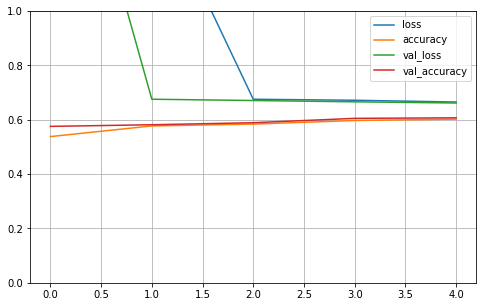

In [9]:
pd.DataFrame(fitted_model2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 7.  Build a CNN model with the following layers.  Train the model for 5 epochs and plot the learning curve.

- a convolutional layer with 32 3x3 filters and ReLU activation function
- a max pooling layer with a pool size of 2
- a convolutional layer with 64 3x3 filters and ReLU activation function
- a max pooling layer with a pool size of 2
- a convolutional layer with 128 3x3 filters and ReLU activation function
- a max pooling layer with a pool size of 2
- a flatten layer
- a dense layer with 64 neurons and ELU activation function
- a dense layer with 32 neurons and ELU activation function
- a dense output layer

In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, MaxPooling2D

model_cnn = keras.models.Sequential()
model_cnn.add(Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(64,64,3)))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(64,64,3)))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(Conv2D(filters=128,kernel_size=3,activation="relu",input_shape=(64,64,3)))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(keras.layers.Flatten(input_shape=[64,64,3]))
model_cnn.add(keras.layers.Dense(64, activation="elu"))
model_cnn.add(keras.layers.Dense(32, activation="elu"))
model_cnn.add(keras.layers.Dense(1, activation="sigmoid"))
model_cnn.compile(loss="binary_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

# Displays all the model’s layers
model_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [14]:
fitted_model3 = model_cnn.fit(data_train, epochs=5, validation_data=(data_test))

Epoch 1/5
250/250 [==============================] - 86s 341ms/step - loss: 0.6883 - accuracy: 0.5412 - val_loss: 0.6811 - val_accuracy: 0.5585
Epoch 2/5
250/250 [==============================] - 77s 307ms/step - loss: 0.6764 - accuracy: 0.5846 - val_loss: 0.6688 - val_accuracy: 0.5985
Epoch 3/5
250/250 [==============================] - 78s 312ms/step - loss: 0.6634 - accuracy: 0.6004 - val_loss: 0.6559 - val_accuracy: 0.6250
Epoch 4/5
250/250 [==============================] - 76s 304ms/step - loss: 0.6559 - accuracy: 0.6091 - val_loss: 0.6556 - val_accuracy: 0.5945
Epoch 5/5
250/250 [==============================] - 77s 308ms/step - loss: 0.6458 - accuracy: 0.6225 - val_loss: 0.6524 - val_accuracy: 0.6135


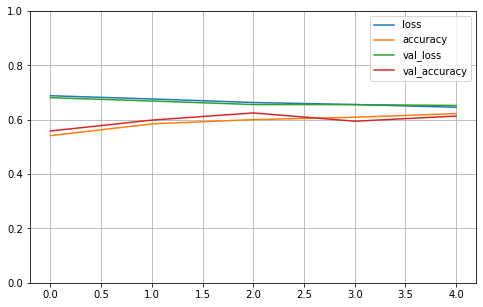

In [15]:
pd.DataFrame(fitted_model3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 8. Build the second CNN model by adding Dropout with dropout rate of 20% after every max pooling layer and hidden dense layer. Train the model for 5 epochs and plot the learning curve.

In [16]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, MaxPooling2D, Dropout

model_cnn2 = keras.models.Sequential()
model_cnn2.add(Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(64,64,3)))
model_cnn2.add(MaxPooling2D(pool_size=2))
model_cnn2.add(Dropout(0.2, input_shape=(64,64,3)))
model_cnn2.add(Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(64,64,3)))
model_cnn2.add(MaxPooling2D(pool_size=2))
model_cnn2.add(Dropout(0.2, input_shape=(64,64,3)))
model_cnn2.add(Conv2D(filters=128,kernel_size=3,activation="relu",input_shape=(64,64,3)))
model_cnn2.add(MaxPooling2D(pool_size=2))
model_cnn2.add(Dropout(0.2, input_shape=(64,64,3)))
model_cnn2.add(keras.layers.Flatten(input_shape=[64,64,3]))
model_cnn2.add(keras.layers.Dense(64, activation="elu"))
model_cnn2.add(Dropout(0.2, input_shape=(64,64,3)))
model_cnn2.add(keras.layers.Dense(32, activation="elu"))
model_cnn2.add(Dropout(0.2, input_shape=(64,64,3)))
model_cnn2.add(keras.layers.Dense(1, activation="sigmoid"))
model_cnn2.add(Dropout(0.2, input_shape=(64,64,3)))
model_cnn2.compile(loss="binary_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

# Displays all the model’s layers
model_cnn2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)       

In [17]:
fitted_model4 = model_cnn2.fit(data_train, epochs=5, validation_data=(data_test))

Epoch 1/5
250/250 [==============================] - 84s 330ms/step - loss: 2.1004 - accuracy: 0.5050 - val_loss: 0.7027 - val_accuracy: 0.5000
Epoch 2/5
250/250 [==============================] - 83s 333ms/step - loss: 2.0538 - accuracy: 0.5206 - val_loss: 0.7062 - val_accuracy: 0.5000
Epoch 3/5
250/250 [==============================] - 78s 312ms/step - loss: 2.1275 - accuracy: 0.5360 - val_loss: 0.6973 - val_accuracy: 0.4995
Epoch 4/5
250/250 [==============================] - 77s 308ms/step - loss: 2.1295 - accuracy: 0.5585 - val_loss: 0.7120 - val_accuracy: 0.5000
Epoch 5/5
250/250 [==============================] - 78s 311ms/step - loss: 2.1067 - accuracy: 0.5710 - val_loss: 0.7355 - val_accuracy: 0.5010


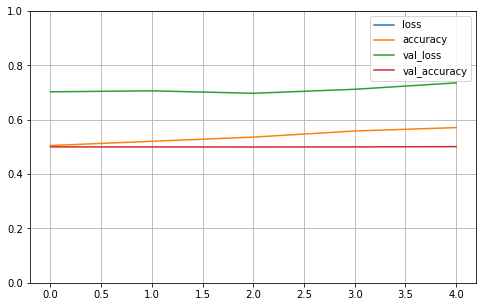

In [18]:
pd.DataFrame(fitted_model4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()